# PROYECTO EDA

In [299]:
! pip install missingno lazypredict scikit-optimize
! pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.ensemble import IsolationForest
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import cross_val_score
from lazypredict.Supervised import LazyRegressor
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

In [301]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')
df


id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington     40.65   
1           Jennifer           Manhattan             Midtown     40.75   
2          Elisabeth           Manhattan              Harlem     40.81   
3        LisaRoxanne            Brooklyn        Clinton Hill     40.69   
4              Laura           Manhattan         East Harlem     40.80   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant     40.68   
48891        Marisol            Brooklyn            Bushwick     40.70   
48892  Ilgar & Aysel           Manhattan              Harlem     40.81   
48893            Taz           Manhattan      Hell's Kitchen     40.76   
48894     Christophe           Manhattan      Hell's Kitchen     40.76   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0         -73.97     Private room    149               1                  9   
1         -73.98  Entire home/apt    225               1                 45   
2         -73.94     Private room    150               3                  0   
3         -73.96  Entire home/apt     89               1                270   
4         -73.94  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890     -73.95     Private room     70               2                  0   
48891     -73.93     Private room     40               4                  0   
48892     -73.95  Entire home/apt    115              10                  0   
48893     -73.99      Shared room     55               1                  0   
48894     -73.99     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48895 rows x 16 columns]

In [302]:
df.shape


(48895, 16)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

SE OBSERVA QUE EN EL DF EXISTEN NaN EN 'last_review' , 'reviews_per_month' , 'name' Y 'host_name'. TAMBIEN SE APRECIA QUE EXISTEN 6 COLUMNAS TIPO OBJECT.

In [304]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [305]:
# Comprobación de duplicados
df.duplicated().sum()

0

In [306]:
df.describe().T

count        mean         std     min  \
id                             48895.00 19017143.24 10983108.39 2539.00   
host_id                        48895.00 67620010.65 78610967.03 2438.00   
latitude                       48895.00       40.73        0.05   40.50   
longitude                      48895.00      -73.95        0.05  -74.24   
price                          48895.00      152.72      240.15    0.00   
minimum_nights                 48895.00        7.03       20.51    1.00   
number_of_reviews              48895.00       23.27       44.55    0.00   
reviews_per_month              38843.00        1.37        1.68    0.01   
calculated_host_listings_count 48895.00        7.14       32.95    1.00   
availability_365               48895.00      112.78      131.62    0.00   

                                      25%         50%          75%  \
id                             9471945.00 19677284.00  29152178.50   
host_id                        7822033.00 30793816.00 107434423.00   
latitude                            40.69       40.72        40.76   
longitude                          -73.98      -73.96       -73.94   
price                               69.00      106.00       175.00   
minimum_nights                       1.00        3.00         5.00   
number_of_reviews                    1.00        5.00        24.00   
reviews_per_month                    0.19        0.72         2.02   
calculated_host_listings_count       1.00        1.00         2.00   
availability_365                     0.00       45.00       227.00   

                                        max  
id                              36487245.00  
host_id                        274321313.00  
latitude                              40.91  
longitude                            -73.71  
price                              10000.00  
minimum_nights                      1250.00  
number_of_reviews                    629.00  
reviews_per_month                     58.50  
calculated_host_listings_count       327.00  
availability_365                     365.00

- SE OBSERVA QUE EN EL CONJUNTO DE DATOS EN LA COLUMNA DE 'price' EL MINIMO ES 0 ESTO NOS DA UN ERROR DE PUBLICACION
- ADEMAS SERIA CONVENIENTE TAMBIEN REVISAR LOS ANUNCIOS CON 'minimum_nights' DE 1250 YA QUE SE SOBREPASA DE LA MEDIA MUCHO.

In [307]:
alquiler_cero = df[df['price'] == 0]
alquiler_cero


id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   
25794  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25795  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25796  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26259  20933849                              the best you can find   13709292   
26841  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26866  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant     40.69   
25433        Anisha               Bronx     East Morrisania     40.83   
25634  Martial Loft            Brooklyn            Bushwick     40.69   
25753        Lauren            Brooklyn          Greenpoint     40.72   
25778       Aymeric            Brooklyn        Williamsburg     40.71   
25794       Adeyemi            Brooklyn  Bedford-Stuyvesant     40.68   
25795       Adeyemi            Brooklyn  Bedford-Stuyvesant     40.68   
25796       Adeyemi            Brooklyn  Bedford-Stuyvesant     40.68   
26259        Qiuchi           Manhattan         Murray Hill     40.75   
26841        Sergii            Brooklyn            Bushwick     40.69   
26866        Sergii            Brooklyn            Bushwick     40.69   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161     -73.95     Private room      0               4                  1   
25433     -73.89     Private room      0               2                 55   
25634     -73.92     Private room      0               2                 16   
25753     -73.94     Private room      0               2                 12   
25778     -73.95  Entire home/apt      0               5                  3   
25794     -73.91     Private room      0               1                 93   
25795     -73.91     Private room      0               1                 95   
25796     -73.91     Private room      0               1                 95   
26259     -73.98  Entire home/apt      0               3                  0   
26841     -73.91      Shared room      0              30                  2   
26866     -73.91      Shared room      0              30                  5   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   
25794  2019-06-15               4.28                               6   
25795  2019-06-21               4.37                               6   
25796  2019-06-23               4.35                               6   
26259         NaN                NaN                               1   
26841  2019-06-22               0.11                               6   
26866  2019-05-24               0.26                               6   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73  
25794               176  
25795               232  
25796               222  
26259                 0  
26841               333  
26866               139

In [308]:
alquiler_cero.shape

(11, 16)

In [309]:
df = df[df['price'] != 0]


In [310]:
df

id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
0               John            Brooklyn          Kensington     40.65   
1           Jennifer           Manhattan             Midtown     40.75   
2          Elisabeth           Manhattan              Harlem     40.81   
3        LisaRoxanne            Brooklyn        Clinton Hill     40.69   
4              Laura           Manhattan         East Harlem     40.80   
...              ...                 ...                 ...       ...   
48890        Sabrina            Brooklyn  Bedford-Stuyvesant     40.68   
48891        Marisol            Brooklyn            Bushwick     40.70   
48892  Ilgar & Aysel           Manhattan              Harlem     40.81   
48893            Taz           Manhattan      Hell's Kitchen     40.76   
48894     Christophe           Manhattan      Hell's Kitchen     40.76   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0         -73.97     Private room    149               1                  9   
1         -73.98  Entire home/apt    225               1                 45   
2         -73.94     Private room    150               3                  0   
3         -73.96  Entire home/apt     89               1                270   
4         -73.94  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890     -73.95     Private room     70               2                  0   
48891     -73.93     Private room     40               4                  0   
48892     -73.95  Entire home/apt    115              10                  0   
48893     -73.99      Shared room     55               1                  0   
48894     -73.99     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
0      2018-10-19               0.21                               6   
1      2019-05-21               0.38                               2   
2             NaN                NaN                               1   
3      2019-07-05               4.64                               1   
4      2018-11-19               0.10                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
0                   365  
1                   355  
2                   365  
3                   194  
4                     0  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[48884 rows x 16 columns]

SE HA ELIMINADO LAS 11 FILAS CON VALOR 'price' 0

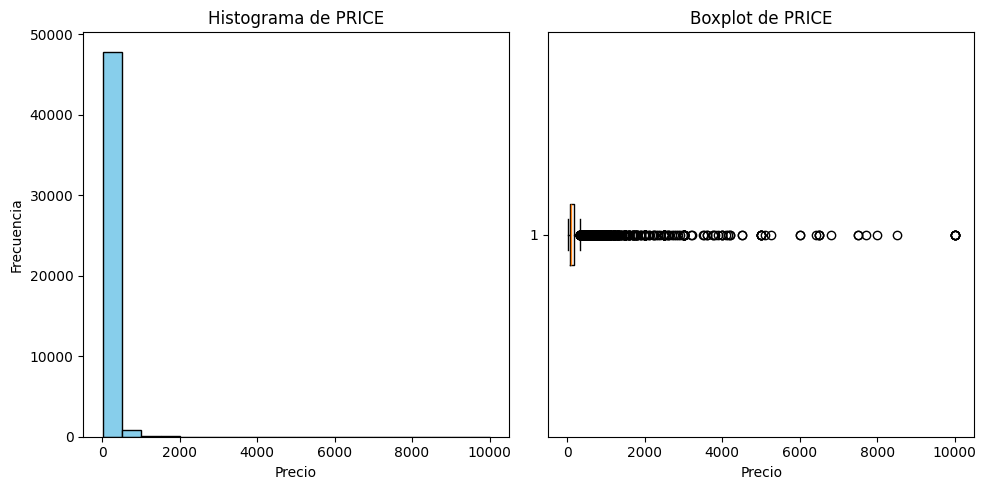

In [311]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

EN LOS ANTERIORES GRAFICOS SE REPRESENTA COMO LA MAYORIA DE LOS PRECIOS DE LOS ALQUILERES SE CONSIGUEN MENOS DE 400$ TAMBIEN SE PUEDE APRECIAR COMO EXISTE UNA VIVIENDA CON UN ALQUILER DE 10000$ ESTO PUEDE SER UN VALOR ATIPICO. 

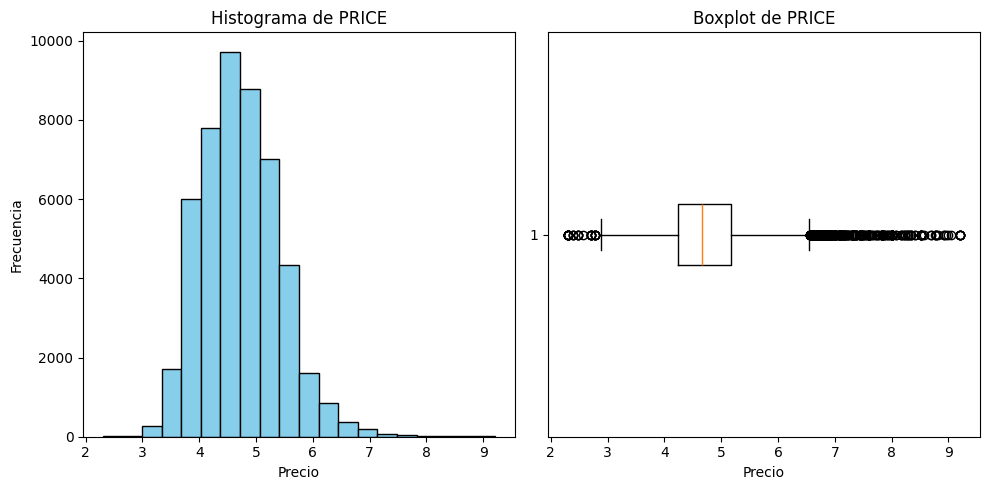

In [312]:
df['LOG_PRICE'] = np.log(df.price)
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['LOG_PRICE'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de PRICE')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['LOG_PRICE'], vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [313]:
# Incidencia de los valores perdidos en cada una de las variables.
df.isnull().mean() * 100

id                                0.00
name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
LOG_PRICE                         0.00
dtype: float64

<Axes: >

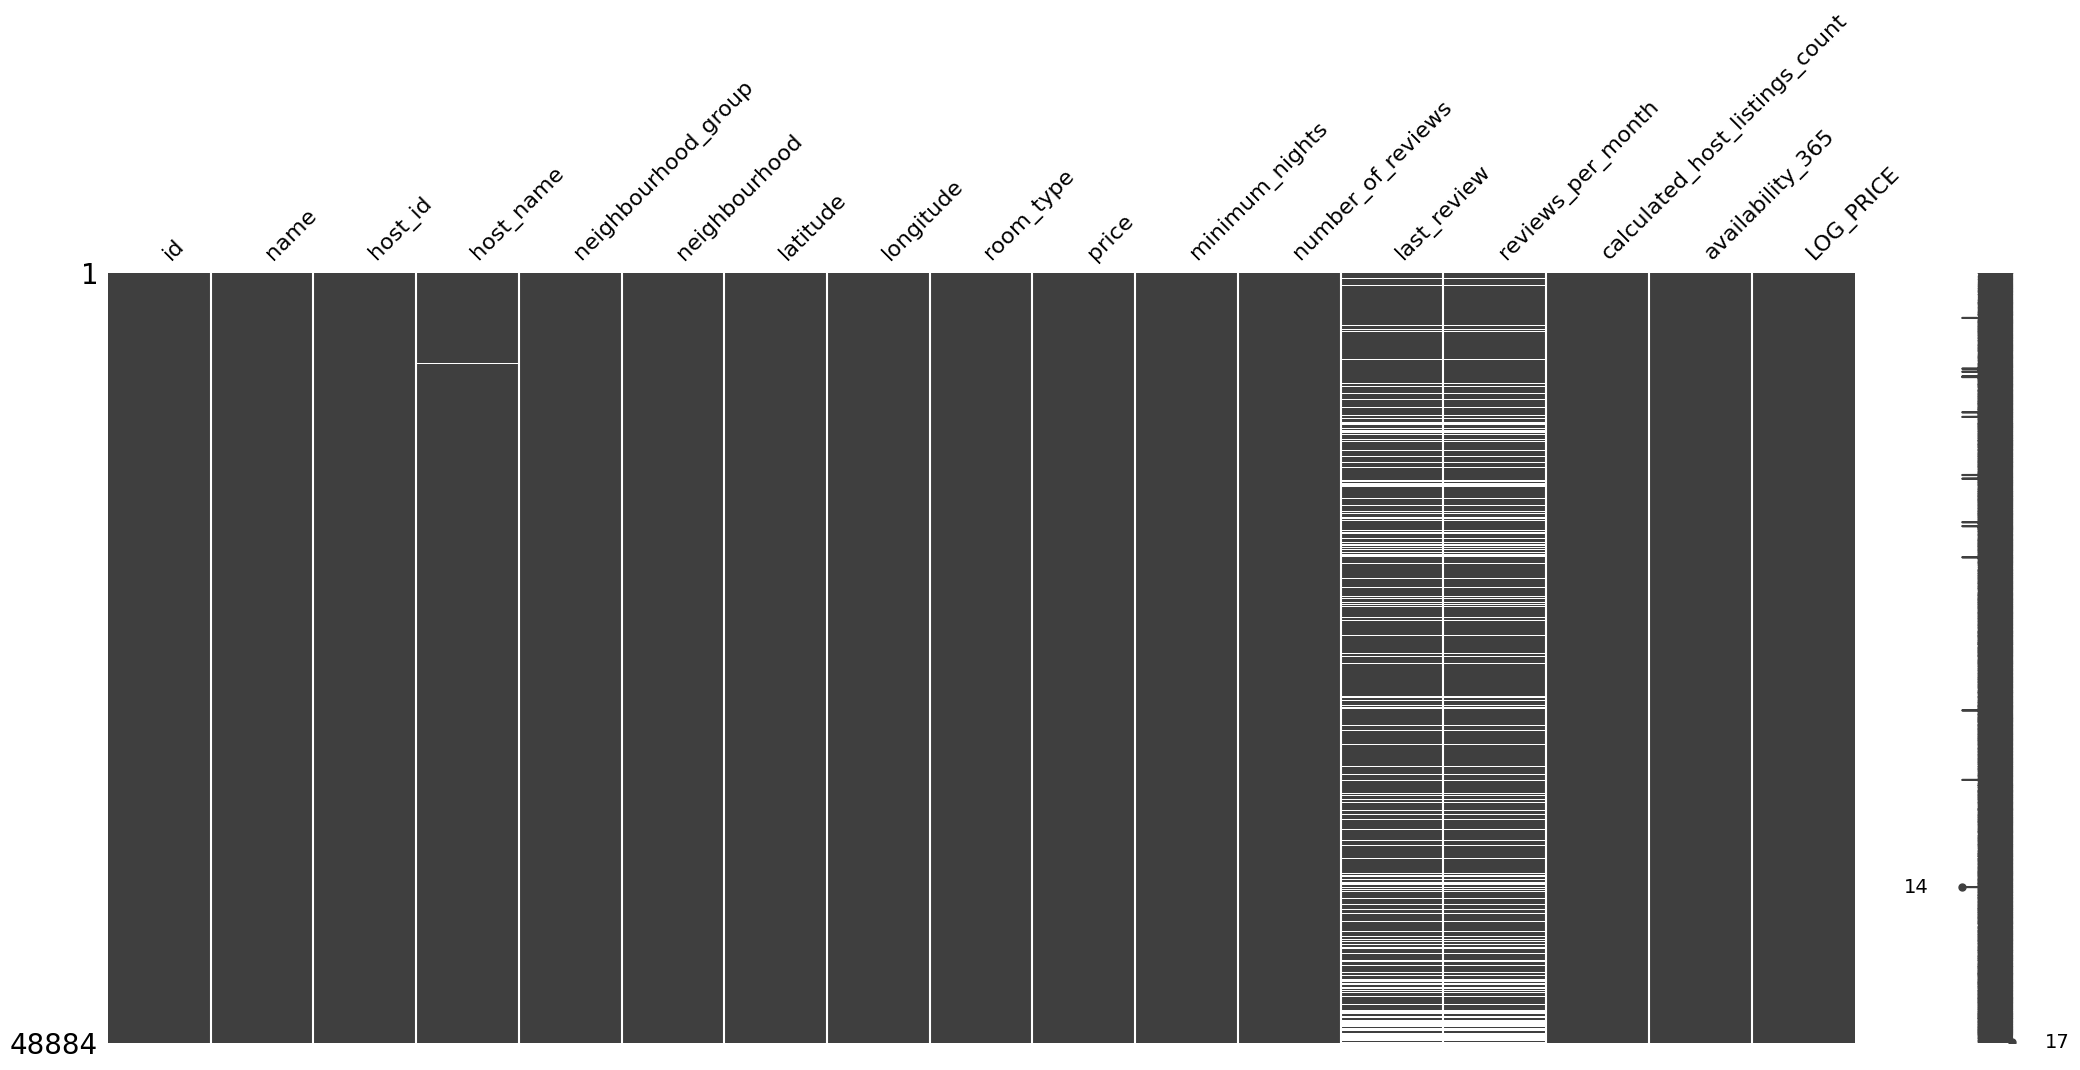

In [314]:
# Visualizamos los valores faltantes como una matriz
msno.matrix(df)

EN EL ANTERIOR GRAFICO SE PUEDE VER COMO EN LAS COLUMNAS 'last_review' Y 'reviews_per_month' LOS VALORES FALTANTES SIGUEN UN PATRON Y SI ANALIZAMOS EL POR QUE, SE PUEDE LLEGAR A LA CONCLUSION QUE ES PORQUE LAS CASA CON VALORES NAN SON CASA CON UNA FECHA DE PUBLICACION MUY RECIENTE EN EL DATASET. PODRIAMOS CAMBIAR LOS VALORES FALTANTES DE 'last_review' POR 0 Y 'reviews_per_month' POR 0 PERO COMO LA VARIABLE QUE QUEREMOS PREDECIR ES 'price' NO NOS INTERESA MANTENER ESTAS VARIABLES.              

In [315]:
df_limpio = df.drop(['last_review', 'reviews_per_month' , 'name' , 'host_name'], axis=1)
df_limpio


id   host_id neighbourhood_group       neighbourhood  latitude  \
0          2539      2787            Brooklyn          Kensington     40.65   
1          2595      2845           Manhattan             Midtown     40.75   
2          3647      4632           Manhattan              Harlem     40.81   
3          3831      4869            Brooklyn        Clinton Hill     40.69   
4          5022      7192           Manhattan         East Harlem     40.80   
...         ...       ...                 ...                 ...       ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant     40.68   
48891  36485057   6570630            Brooklyn            Bushwick     40.70   
48892  36485431  23492952           Manhattan              Harlem     40.81   
48893  36485609  30985759           Manhattan      Hell's Kitchen     40.76   
48894  36487245  68119814           Manhattan      Hell's Kitchen     40.76   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0         -73.97     Private room    149               1                  9   
1         -73.98  Entire home/apt    225               1                 45   
2         -73.94     Private room    150               3                  0   
3         -73.96  Entire home/apt     89               1                270   
4         -73.94  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890     -73.95     Private room     70               2                  0   
48891     -73.93     Private room     40               4                  0   
48892     -73.95  Entire home/apt    115              10                  0   
48893     -73.99      Shared room     55               1                  0   
48894     -73.99     Private room     90               7                  0   

       calculated_host_listings_count  availability_365  LOG_PRICE  
0                                   6               365       5.00  
1                                   2               355       5.42  
2                                   1               365       5.01  
3                                   1               194       4.49  
4                                   1                 0       4.38  
...                               ...               ...        ...  
48890                               2                 9       4.25  
48891                               2                36       3.69  
48892                               1                27       4.74  
48893                               6                 2       4.01  
48894                               1                23       4.50  

[48884 rows x 13 columns]

LAS FILAS DEL df SIN VALOR PARA LAS COLUMNAS 'host_id' Y 'host_name' SON 37 LAS ELIMINAMOS YA QUE SON 48884 Y ES INSIGNIFICANTE QUE ELIMINE ESAS POCAS.

In [316]:
df_limpio = df_limpio.dropna()
df_limpio


id   host_id neighbourhood_group       neighbourhood  latitude  \
0          2539      2787            Brooklyn          Kensington     40.65   
1          2595      2845           Manhattan             Midtown     40.75   
2          3647      4632           Manhattan              Harlem     40.81   
3          3831      4869            Brooklyn        Clinton Hill     40.69   
4          5022      7192           Manhattan         East Harlem     40.80   
...         ...       ...                 ...                 ...       ...   
48890  36484665   8232441            Brooklyn  Bedford-Stuyvesant     40.68   
48891  36485057   6570630            Brooklyn            Bushwick     40.70   
48892  36485431  23492952           Manhattan              Harlem     40.81   
48893  36485609  30985759           Manhattan      Hell's Kitchen     40.76   
48894  36487245  68119814           Manhattan      Hell's Kitchen     40.76   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
0         -73.97     Private room    149               1                  9   
1         -73.98  Entire home/apt    225               1                 45   
2         -73.94     Private room    150               3                  0   
3         -73.96  Entire home/apt     89               1                270   
4         -73.94  Entire home/apt     80              10                  9   
...          ...              ...    ...             ...                ...   
48890     -73.95     Private room     70               2                  0   
48891     -73.93     Private room     40               4                  0   
48892     -73.95  Entire home/apt    115              10                  0   
48893     -73.99      Shared room     55               1                  0   
48894     -73.99     Private room     90               7                  0   

       calculated_host_listings_count  availability_365  LOG_PRICE  
0                                   6               365       5.00  
1                                   2               355       5.42  
2                                   1               365       5.01  
3                                   1               194       4.49  
4                                   1                 0       4.38  
...                               ...               ...        ...  
48890                               2                 9       4.25  
48891                               2                36       3.69  
48892                               1                27       4.74  
48893                               6                 2       4.01  
48894                               1                23       4.50  

[48884 rows x 13 columns]

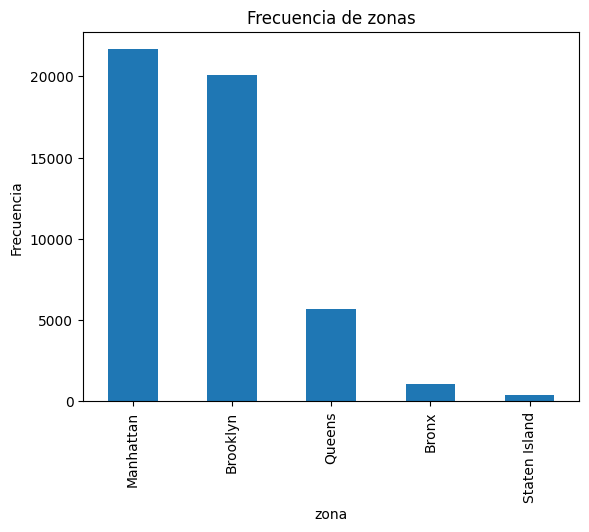

In [317]:
# Contamos cuántas veces aparece cada valor único en la columna 'neighbourhood_group'
conteo_neighbourhood = df_limpio['neighbourhood_group'].value_counts()

# Creamos un gráfico de barras
conteo_neighbourhood.plot(kind='bar')
plt.title('Frecuencia de zonas')
plt.xlabel('zona')
plt.ylabel('Frecuencia')
plt.show()



SE PUEDE APRECIAR COMO LA ZONA DE MANHATTAN ES DONDE MÁS ANUNCIOS TIENE.

In [318]:
# Comprobamos que ahora hemos dejado de tener valores faltantes en el dataset
df_limpio.isna().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
LOG_PRICE                         0
dtype: int64

In [319]:
# Se muestra los tipos de datos de todas las columnas
tipos = df_limpio.dtypes
print(tipos)

# Se filtra y muestra solo las columnas de tipo 'object'
columnas_objeto = tipos[tipos == 'object'].index.tolist()
print("Columnas de tipo 'object':", columnas_objeto)


# Crear un DataFrame con las columnas que no son de tipo 'object'
df_numerico = df_limpio.select_dtypes(exclude=['object'])


id                                  int64
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
LOG_PRICE                         float64
dtype: object
Columnas de tipo 'object': ['neighbourhood_group', 'neighbourhood', 'room_type']


In [320]:
#df_binario = pd.get_dummies(df_limpio[['neighbourhood_group', 'neighbourhood', 'room_type']])
# Convertir True/False a 0/1
#df_binario = df_binario.astype(int)

# 5.Estudio de valores atípicos

## 5.1 Identificación de observaciones influyentes

In [321]:
# Variables independientes/dependiente
X = df_numerico.drop(['price', 'LOG_PRICE'], axis=1)
y = df_numerico['LOG_PRICE']

# Ajusta el modelo
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación
cooks_distance = model.get_influence().cooks_distance

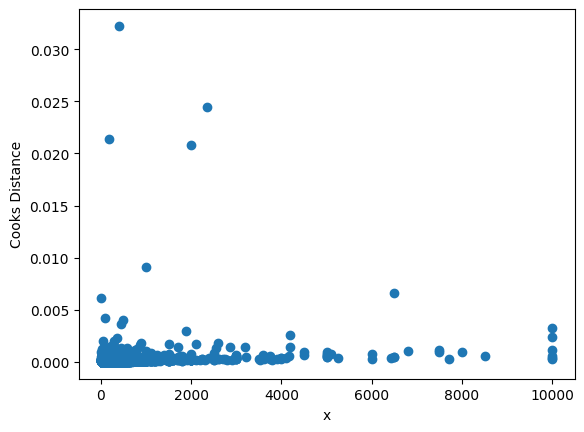

In [322]:
plt.scatter(df_numerico.price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [323]:
# Consultamos la observación más influyente
np.where(cooks_distance[0]>0.004)

(array([ 2854,  5767, 13404, 13788, 17811, 21281, 44418, 48032]),)

In [324]:
# Lista de índices de las filas que quieres ver
indices_filas = [ 2854,  5767, 13404, 13788, 17811, 21281, 44418, 48032]

# Seleccionar y mostrar solo estas filas
df_atipico_cooks = df_numerico.iloc[indices_filas]
df_atipico_cooks


id    host_id  latitude  longitude  price  minimum_nights  \
2854    1615764    6676776     40.71     -74.02    400            1000   
5767    4204302   17550546     40.73     -74.00    180            1250   
13404  10053943    2697686     40.83     -73.94     99             999   
13788  10386936   53471415     40.71     -73.95   1002             365   
17811  13963005   41870118     40.72     -73.84   2350             365   
21281  16927533    3737986     40.71     -74.02     12             300   
44429  34221161    9295237     40.76     -73.91   2000             365   
48043  36056808  271248669     40.71     -74.01   6500             180   

       number_of_reviews  calculated_host_listings_count  availability_365  \
2854                   0                               1               362   
5767                   2                               1               365   
13404                  2                               1                42   
13788                 10                               1               365   
17811                  0                               1               364   
21281                  0                               1                 0   
44429                  0                               2                 0   
48043                  0                               1               365   

       LOG_PRICE  
2854        5.99  
5767        5.19  
13404       4.60  
13788       6.91  
17811       7.76  
21281       2.48  
44429       7.60  
48043       8.78

SE PUEDE VER QUE LAS ANTERIORES FILAS RESULTAN SER INFLUYENTES POR SU CANTIDAD MINIMA DE NOCHES, PROCEDEMOS A ELIMINAR ESTAS FILAS.

In [325]:
df_numerico.drop([2854,  5767, 13404, 13788, 17811, 21281, 44418, 48032], axis=0, inplace=True)

## 5.2.Identificiación de la presencia y tratamiento de valores atípicos


In [326]:
# Selecciona las columnas de tipo 'object' que deseas convertir
columns_to_dummies = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Utiliza get_dummies para convertir estas columnas
df_dummies = pd.get_dummies(df_limpio[columns_to_dummies])

# Ahora, si deseas, puedes unir estas nuevas columnas con tu DataFrame original
df_limpio = pd.concat([df_limpio.drop(columns=columns_to_dummies), df_dummies], axis=1)


In [327]:
df_numerico.apply(lambda x: x.skew())

id                               -0.09
host_id                           1.21
latitude                          0.24
longitude                         1.28
price                            19.16
minimum_nights                   16.90
number_of_reviews                 3.69
calculated_host_listings_count    7.93
availability_365                  0.76
LOG_PRICE                         0.61
dtype: float64

In [328]:
# Función para calcular IQR y aplicar winsorización
def winsorize_column(column, lower, upper):
    q1 = column.quantile(lower)
    q3 = column.quantile(upper)
    iqr_value = q3-q1
    lower_bound = q1 - 1.5 * iqr_value
    upper_bound = q3 + 1.5 * iqr_value
    column = column.clip(lower=lower_bound, upper=upper_bound)
    return column

# Calcular el IQR y aplicar winsorización a cada columna
for column in df_numerico.columns:
    df_numerico[column] = winsorize_column(df_numerico[column], 0.25, 0.75)

In [329]:
df_numerico.apply(lambda x: x.skew())

id                               -0.09
host_id                           1.18
latitude                          0.24
longitude                         0.53
price                             1.02
minimum_nights                    1.29
number_of_reviews                 1.23
calculated_host_listings_count    1.15
availability_365                  0.76
LOG_PRICE                         0.33
dtype: float64

In [330]:
df_new = df_limpio

In [331]:
# Creamos un modelo de Isolation Forest y ajustalo a los datos
model = IsolationForest().fit(df_numerico)

# Predice si cada observación es un valor atípico (anomalía) o no
predictions = model.predict(df_numerico)

# 'predictions' contendrá 1 para observaciones normales y -1 para valores atípicos
print(f'Observaciones predichas como atípicas: {np.where(predictions==-1)[0]}')

Observaciones predichas como atípicas: [    0     1     2 ... 48869 48870 48874]


# 6.Relación entre las variables

## 6.1.Matriz de correlaciones

In [332]:
corr = df_new.corr()
corr.isna().sum()

id                           0
host_id                      0
latitude                     0
longitude                    0
price                        0
                            ..
neighbourhood_Woodrow        0
neighbourhood_Woodside       0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
Length: 239, dtype: int64

In [333]:
corr = df_new.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

In [334]:
corr[corr.LOG_PRICE.abs()>0.4].index

Index(['price', 'LOG_PRICE', 'room_type_Entire home/apt',
       'room_type_Private room'],
      dtype='object')

EN EL RESULTADO ANTERIOR SE PUEDE APRECIAR COMO EL 'room_type' (TIPO DE HABITACION) TIENE CORRELACION MAYOR A 0.4 CON 'LOG_PRICE'.

## 6.2.VIF (Factor de Inflación de la Varianza)

In [335]:
# Calcular los VIF
vif = pd.Series([variance_inflation_factor(corr.values, i) for i in range(corr.shape[1])], index=df_new.columns)

vif

id                                6.07
host_id                           6.04
latitude                       9324.61
longitude                      4616.80
price                            11.89
                               ...    
neighbourhood_Woodrow       2746035.86
neighbourhood_Woodside       193528.13
room_type_Entire home/apt     10176.98
room_type_Private room       136880.27
room_type_Shared room        454773.95
Length: 239, dtype: float64

In [336]:
# Eliminamos algunas de las variables que presentan colinealidad perfecta
#df_new.drop(['neighbourhood_group'], axis=1, inplace=True)
#,'room_type'
#'neighbourhood', 

# 7.Partición

In [337]:
X = df_new.drop(['LOG_PRICE','price'], axis=1)
y = df_new['LOG_PRICE']

SE EXCLUYE 'LOG_PRICE' Y 'price' YA QUE LA VARIABLES QUE QUEREMOS ENCONTRAR ES 'LOG_PRICE' Y 'price' NOS CHIVARIA LOS RESULTADOS.

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [339]:
X_train.isnull().sum()

id                           0
host_id                      0
latitude                     0
longitude                    0
minimum_nights               0
                            ..
neighbourhood_Woodrow        0
neighbourhood_Woodside       0
room_type_Entire home/apt    0
room_type_Private room       0
room_type_Shared room        0
Length: 237, dtype: int64

In [340]:
# Vamos a usar un método embebido que nos informe de la importancia de las características
# Crea un modelo XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Entrena el modelo en los datos de entrenamiento
model.fit(X_train, y_train)

# Calcula la importancia de las características
feature_importances = model.feature_importances_

# Asocia las importancias con los nombres de las características
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Ordena las características por importancia (de mayor a menor)
sorted_feature_importance = dict(sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True))

# Imprime la importancia de las características (número adimensional, las características se comparan entre sí en términos de su contribución relativa a la predicción)
for feature, importance in sorted_feature_importance.items():
    print(f'Feature: {feature}, Importance: {importance}')

Feature: room_type_Entire home/apt, Importance: 0.47276008129119873
Feature: neighbourhood_group_Manhattan, Importance: 0.2072155922651291
Feature: neighbourhood_Midtown, Importance: 0.01806456223130226
Feature: room_type_Private room, Importance: 0.01452089473605156
Feature: neighbourhood_Bedford-Stuyvesant, Importance: 0.013554285280406475
Feature: neighbourhood_Tribeca, Importance: 0.01086114440113306
Feature: longitude, Importance: 0.009781125001609325
Feature: neighbourhood_Williamsburg, Importance: 0.008981317281723022
Feature: latitude, Importance: 0.006945786066353321
Feature: neighbourhood_Upper East Side, Importance: 0.006047490518540144
Feature: neighbourhood_Riverdale, Importance: 0.006008510943502188
Feature: availability_365, Importance: 0.005249215755611658
Feature: minimum_nights, Importance: 0.004973620176315308
Feature: neighbourhood_Astoria, Importance: 0.004861448425799608
Feature: calculated_host_listings_count, Importance: 0.0046264431439340115
Feature: neighbourh

In [341]:
def get_vars_to_delete(d_features_imp, corr_mat, imp_cut=0.006, corr_cut=0.5):
  # Features with correlation less than corr_cut
  corr_features = corr_mat[corr_mat.LOG_PRICE.abs()<corr_cut].index
  # Features to delete
  return [var for var in corr_features if d_features_imp[var]<imp_cut]

X_corr = X_train.copy()
X_corr['LOG_PRICE'] = y_train.values

vars_to_delete = get_vars_to_delete(sorted_feature_importance, X_corr.corr())
vars_to_delete

['id',
 'host_id',
 'minimum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'availability_365',
 'neighbourhood_group_Bronx',
 'neighbourhood_group_Brooklyn',
 'neighbourhood_group_Queens',
 'neighbourhood_group_Staten Island',
 'neighbourhood_Allerton',
 'neighbourhood_Arden Heights',
 'neighbourhood_Arrochar',
 'neighbourhood_Arverne',
 'neighbourhood_Astoria',
 'neighbourhood_Bath Beach',
 'neighbourhood_Battery Park City',
 'neighbourhood_Bay Ridge',
 'neighbourhood_Bay Terrace',
 'neighbourhood_Baychester',
 'neighbourhood_Bayside',
 'neighbourhood_Bayswater',
 'neighbourhood_Belle Harbor',
 'neighbourhood_Bellerose',
 'neighbourhood_Belmont',
 'neighbourhood_Bensonhurst',
 'neighbourhood_Bergen Beach',
 'neighbourhood_Boerum Hill',
 'neighbourhood_Borough Park',
 'neighbourhood_Breezy Point',
 'neighbourhood_Briarwood',
 'neighbourhood_Brighton Beach',
 'neighbourhood_Bronxdale',
 'neighbourhood_Brooklyn Heights',
 'neighbourhood_Brownsville',
 "neighbourhood_

In [342]:
print(f'Porcentaje de variables a eliminar {len(vars_to_delete)/X_train.shape[1]*100}')

Porcentaje de variables a eliminar 94.09282700421942


In [343]:
# Eliminamos las variables poco correlacionadas con la variable respuesta y que además tienen poca importancia relativa
X_train.drop(vars_to_delete, axis=1, inplace=True)
X_test.drop(vars_to_delete, axis=1, inplace=True)

## 9.Escalado de los datos

In [344]:
# Seleccionamos las variables no binarias
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

In [345]:
# Instanciamos el escalador y lo ajustamos a los datos de entrenamiento
scaler = MinMaxScaler().fit(X_train_num)

In [346]:
# Transformamos los datos de entrenamiento y testeo
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [347]:
print(np.min(X_train_num_sc, axis=1), np.max(X_train_num_sc, axis=1),)

[0.50477896 0.49275292 0.71049809 ... 0.65308695 0.49775135 0.56238827] [0.85730952 0.58389628 0.96793864 ... 0.95547705 0.66612626 0.59713988]


In [348]:
# Unimos las variables escaladas con las binarias
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

In [349]:
X_train_sc.head()

latitude  longitude  neighbourhood_group_Manhattan  \
0      0.50       0.86                          False   
1      0.49       0.58                          False   
2      0.97       0.71                          False   
3      0.59       0.47                           True   
4      0.41       0.50                          False   

   neighbourhood_Bay Terrace, Staten Island  neighbourhood_Bedford-Stuyvesant  \
0                                     False                             False   
1                                     False                             False   
2                                     False                             False   
3                                     False                             False   
4                                     False                             False   

   neighbourhood_Midtown  neighbourhood_Riverdale  neighbourhood_Rossville  \
0                  False                    False                    False   
1                  False                    False                    False   
2                  False                    False                    False   
3                  False                    False                    False   
4                  False                    False                    False   

   neighbourhood_Tribeca  neighbourhood_Upper East Side  \
0                  False                          False   
1                  False                          False   
2                  False                          False   
3                  False                          False   
4                  False                          False   

   neighbourhood_Williamsburg  neighbourhood_Woodrow  \
0                       False                  False   
1                        True                  False   
2                       False                  False   
3                       False                  False   
4                       False                  False   

   room_type_Entire home/apt  room_type_Private room  
0                       True                   False  
1                      False                    True  
2                      False                    True  
3                      False                    True  
4                      False                    True

## 10.Reducción de la dimensionalidad

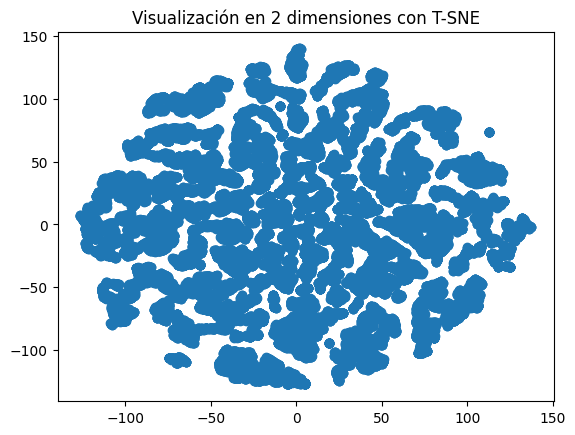

In [350]:
# Probamos la técnica TSNE para visualizar
X_tsne = TSNE(n_components=2).fit_transform(X_train_sc)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Visualización en 2 dimensiones con T-SNE")
plt.show()

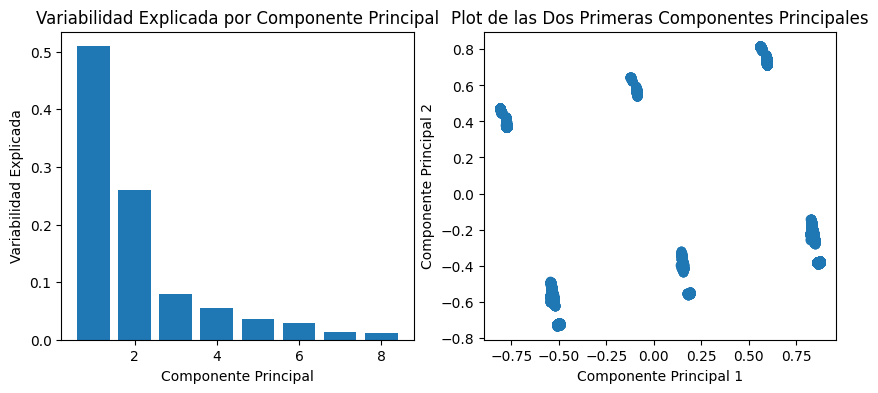

In [351]:
# Inicializa el modelo PCA para conservar el 99% de la variabilidad
pca = PCA(.99)

# Ajusta el modelo PCA a los datos
X_pca_train = pca.fit_transform(X_train_sc)

# Obtén las dos primeras componentes principales
componente_1 = X_pca_train[:, 0]
componente_2 = X_pca_train[:, 1]

# Calcula la variabilidad explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_

# Crea un bar plot de la variabilidad explicada
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada)
plt.xlabel('Componente Principal')
plt.ylabel('Variabilidad Explicada')
plt.title('Variabilidad Explicada por Componente Principal')

# Crea un scatter plot de las dos primeras componentes principales
plt.subplot(1, 2, 2)
plt.scatter(componente_1, componente_2)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Plot de las Dos Primeras Componentes Principales')
plt.show()

In [352]:
print(f'Número de variables antes de PCA {X_train_sc.shape[1]}, número de variables tras aplicar la técnica de PCA {X_pca_train.shape[1]}')

Número de variables antes de PCA 14, número de variables tras aplicar la técnica de PCA 8


In [353]:
# Aplicar PCA sobre el conjunto de test
X_pca_test = pca.transform(X_test_sc)

## 11.Selección del algoritmo

In [354]:
reg = LazyRegressor()
models, predictions = reg.fit(X_pca_train, X_pca_test, y_train, y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

 98%|█████████▊| 41/42 [03:32<00:08,  8.10s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002385 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 39107, number of used features: 8
[LightGBM] [Info] Start training from score 4.727598


100%|██████████| 42/42 [03:33<00:00,  5.07s/it]


In [355]:
print(models)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.52       0.52  0.48        0.42
HistGradientBoostingRegressor                0.52       0.52  0.48        0.48
XGBRegressor                                 0.52       0.52  0.48        0.30
GradientBoostingRegressor                    0.51       0.51  0.49       12.52
MLPRegressor                                 0.49       0.49  0.50        5.15
NuSVR                                        0.49       0.49  0.50       74.78
SVR                                          0.49       0.49  0.50       62.09
RandomForestRegressor                        0.48       0.48  0.50       40.03
ElasticNetCV                                 0.46       0.46  0.51        0.13
LassoCV                                      0.46       0.46  0.51        0.17
BayesianRidge                                0.46   

COMO SE PUEDE OBSERVAR XGBRegressor ES EL MEJOR MODELO A UTILIZAR TENIENDO UN R-SQUARED MAYOR CON UN TIEMPO DE EJEUCION MAS BAJO QUE SUS SUPERIORES.